# Gesture UI Project - Fashion Image Classification
## Data Exploration & Preprocessing
### Author: [Aaron Cronnelly G00403528]
---
### **Objective:**
This notebook explores and cleans the **Fashion Image Classification dataset** for a machine learning model.  
The key steps include:
1. **Loading & Inspecting the Dataset** – Checking dataset structure and sample images.
2. **Data Cleaning & Preprocessing** – Normalizing data and converting labels.
3. **Exploratory Data Analysis (EDA)** – Identifying patterns and class distributions.
---


Categories: ['.DS_Store', 'dress', 'sneaker', 'coat', 'tshirt-top', 'sandal', 'ankleboot', 'bag', 'shirt', 'pullover', 'trouser']

Number of images per category:
     Category  Image Count
0       dress         7000
1     sneaker         7000
2        coat         7000
3  tshirt-top         7000
4      sandal         7000
5   ankleboot         7000
6         bag         7000
7       shirt         7000
8    pullover         7000
9     trouser         7000


/Users/aaroncronnelly/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aaroncronnelly/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aaroncronnelly/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


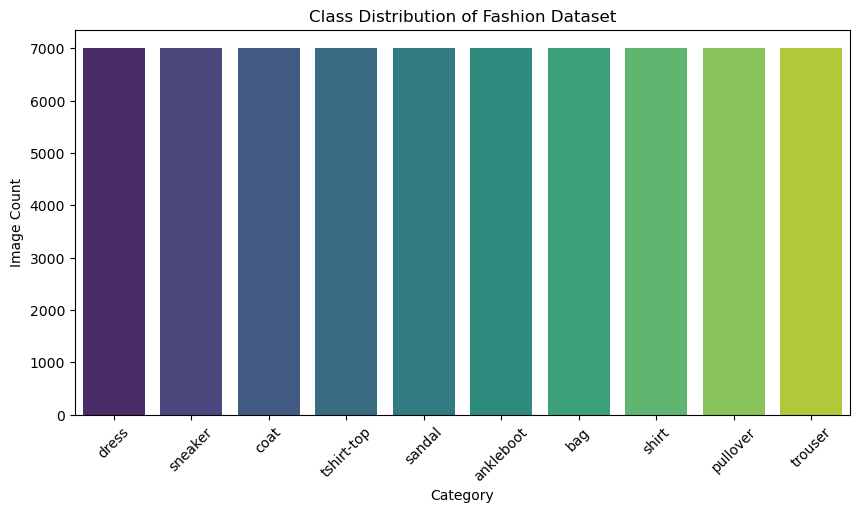

In [6]:
# 2. Load & Inspect the Dataset

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Define dataset path
dataset_path = "../data/fashion"  

# Check categories (classes)
categories = os.listdir(dataset_path)
print(f"Categories: {categories}")

# Count number of images in each category, ignoring non-directory files
category_counts = {category: len(os.listdir(os.path.join(dataset_path, category))) for category in categories if os.path.isdir(os.path.join(dataset_path, category))}
category_df = pd.DataFrame(category_counts.items(), columns=["Category", "Image Count"])

# Display category counts
print("\nNumber of images per category:")
print(category_df)

# Visualize class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=category_df["Category"], y=category_df["Image Count"], palette='viridis')
plt.xticks(rotation=45)
plt.title("Class Distribution of Fashion Dataset")
plt.xlabel("Category")
plt.ylabel("Image Count")
plt.show()


Explanation:
- Lists all categories in the dataset.
- Counts the number of images per category.
- Creates a bar chart to visualize the distribution.

## 3. Data Cleaning & Preprocessing
---
To prepare the dataset for modeling, we:
- **Ensure all images have the same size (28x28 pixels)**.
- **Normalize pixel values** (scale them between 0 and 1).
- **Convert class labels to numeric values** for training.


In [7]:
# 3. Data Cleaning & Preprocessing

def load_and_preprocess_images(dataset_path, categories):
    data = []
    labels = []

    for label, category in enumerate(categories):  # Assign numeric labels
        category_path = os.path.join(dataset_path, category)
        if os.path.isdir(category_path):  # Check if it's a directory
            for img_name in os.listdir(category_path):
                img_path = os.path.join(category_path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
                img = img / 255.0  # Normalize pixel values (0 to 1)

                data.append(img)
                labels.append(label)

    return np.array(data), np.array(labels)

# Load and preprocess images
X, y = load_and_preprocess_images(dataset_path, categories)

# Check dataset shape
print("Dataset shape:", X.shape)  # Should be (num_samples, 28, 28)
print("Labels shape:", y.shape)

# Check first few labels
print("First 10 labels:", y[:10])


Dataset shape: (70000, 28, 28)
Labels shape: (70000,)
First 10 labels: [1 1 1 1 1 1 1 1 1 1]


Explanation:
- Reads images from the dataset.
- Normalizes pixel values to 0-1.
- Converts category names into numeric labels.